In [95]:
import numpy as np
import pandas as pd

In [96]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')
df.head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,not available,2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall ...",NaN,"['Lift(s)', 'Park']"
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room",4.0,NaN,Within 6 months,"['Sant Soordas Sihi Metro Station', 'Airia Mal...",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s..."
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,not available,0.0,NaN,Under Construction,"['V3S Sapphire Ninety Mall', 'Sector 86 Road',...",[],"['Intercom Facility', 'Lift(s)', 'Park']"
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,not available,17.0,NaN,0 to 1 Year Old,"['Huda City Centre', 'Omaxe City Centre', 'Nin...",[],"['Feng Shui / Vaastu Compliant', 'Security / F..."
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,"servant room,others",10.0,North-West,1 to 5 Year Old,"['Sapphire 93 Mall', 'Dwarka Expressway', 'NH-...","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Ge...","['Centrally Air Conditioned', 'Water purifier'..."
5,flat,suncity avenue,sector 102,0.48,9022.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,store room,5.0,North-East,1 to 5 Year Old,"['The Hive', 'JMS Marine Square', 'Gurugram Rd...","['3 Fan', '10 Light', 'No AC', 'No Bed', 'No C...","['Centrally Air Conditioned', 'Water purifier'..."
6,flat,paras quartier,gwal pahari,7.50,14018.0,5350.0,Super Built up area 5350(497.03 sq.m.),4,4,3+,"pooja room,servant room,others",20.0,North-East,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'Ambience Mall'...","['4 Wardrobe', '3 Fan', '1 Geyser', '1 Microwa...","['Feng Shui / Vaastu Compliant', 'Security / F..."
7,flat,experion the heartsong,sector 108,2.00,8554.0,2338.0,Super Built up area 2338(217.21 sq.m.),3,3,3+,servant room,14.0,East,1 to 5 Year Old,"['Galleria 108 Mall', 'Dwarka Expressway', 'Ce...","['5 AC', 'No Bed', 'No Chimney', 'No Curtains'...","['Security / Fire Alarm', 'Feng Shui / Vaastu ..."
8,flat,adani m2k oyster grande,sector 102,1.90,9105.0,2087.0,Super Built up area 1889(175.49 sq.m.),3,4,3,servant room,8.0,North-East,1 to 5 Year Old,"['WTC Plaza', 'Star Mall', 'Dwarka Expy, Dhanw...","['7 Fan', '4 Geyser', '6 Light', '5 AC', 'No B...","['Water purifier', 'Security / Fire Alarm', 'F..."
9,house,independent,sector 105,1.20,10122.0,1186.0,Plot area 1185.51(110.14 sq.m.),6,2,1,not available,2.0,North-West,10+ Year Old,"['Palam Vihar Vyapar kendra', 'Chintapurni Man...",NaN,"['Private Garden / Terrace', 'Waste Disposal']"


In [97]:
df.duplicated().sum()

122

In [98]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
889,0.22,700.0,Carpet area: 700 (65.03 sq.m.)
2950,2.35,2400.0,Carpet area: 2400 (222.97 sq.m.)
425,0.89,1095.0,Built Up area: 1095 (101.73 sq.m.)
1673,2.45,2780.0,Super Built up area 2780(258.27 sq.m.)
2630,0.48,670.0,Carpet area: 670 (62.25 sq.m.)


In [99]:
df.areaWithType = df.areaWithType.str.lower()

In [100]:
df[df.areaWithType.str.contains('super built up area')].shape

(1915, 17)

In [101]:
import re

In [102]:
def get_super_builtup_area(x):
    match = re.search(r'super built up area (\d+\.?\d*)' , x)
    if match:
        return float(match.group(1))
    else:
        return None

In [103]:
def builtup_or_carpet(text , areatype):
    match = re.search(areatype + r'\s*:\s*(\d+\.?\d*)',text)
    if match:
        return float(match.group(1))
    else:
        return None

In [104]:
df['super_built_up_area'] = df['areaWithType'].apply(get_super_builtup_area)
df['built_up_area'] = df['areaWithType'].apply(lambda x : builtup_or_carpet(x , 'built up area'))
df['carpet_area'] = df['areaWithType'].apply(lambda x: builtup_or_carpet(x , 'carpet area'))

In [105]:
df.super_built_up_area

0       1081.0
1          NaN
2          NaN
3          NaN
4       1995.0
         ...  
3798     583.0
3799       NaN
3800     735.0
3801       NaN
3802    1950.0
Name: super_built_up_area, Length: 3803, dtype: float64

In [106]:
df.built_up_area

0          NaN
1          NaN
2          NaN
3       1000.0
4       1615.0
         ...  
3798       NaN
3799       NaN
3800       NaN
3801       NaN
3802    1845.0
Name: built_up_area, Length: 3803, dtype: float64

In [107]:
df.carpet_area

0         650.0
1        1103.0
2       58141.0
3         585.0
4        1476.0
         ...   
3798      483.0
3799        NaN
3800        NaN
3801        NaN
3802     1530.0
Name: carpet_area, Length: 3803, dtype: float64

In [108]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,super built up area 1081(100.43 sq.m.)carpet a...,3,2,2,not available,2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall ...",NaN,"['Lift(s)', 'Park']",1081.0,NaN,650.0
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room",4.0,NaN,Within 6 months,"['Sant Soordas Sihi Metro Station', 'Airia Mal...",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s...",NaN,NaN,1103.0
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,carpet area: 58141 (5401.48 sq.m.),2,2,1,not available,0.0,NaN,Under Construction,"['V3S Sapphire Ninety Mall', 'Sector 86 Road',...",[],"['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,58141.0
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,built up area: 1000 (92.9 sq.m.)carpet area: 5...,2,2,1,not available,17.0,NaN,0 to 1 Year Old,"['Huda City Centre', 'Omaxe City Centre', 'Nin...",[],"['Feng Shui / Vaastu Compliant', 'Security / F...",NaN,1000.0,585.0
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,super built up area 1995(185.34 sq.m.)built up...,3,4,3+,"servant room,others",10.0,North-West,1 to 5 Year Old,"['Sapphire 93 Mall', 'Dwarka Expressway', 'NH-...","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Ge...","['Centrally Air Conditioned', 'Water purifier'...",1995.0,1615.0,1476.0


In [109]:
df[['areaWithType' ,'super_built_up_area','built_up_area','carpet_area'] ]

,areaWithType,super_built_up_area,built_up_area,carpet_area
0,super built up area 1081(100.43 sq.m.)carpet a...,1081.0,NaN,650.0
1,carpet area: 1103 (102.47 sq.m.),NaN,NaN,1103.0
2,carpet area: 58141 (5401.48 sq.m.),NaN,NaN,58141.0
3,built up area: 1000 (92.9 sq.m.)carpet area: 5...,NaN,1000.0,585.0
4,super built up area 1995(185.34 sq.m.)built up...,1995.0,1615.0,1476.0
...,...,...,...,...
3798,super built up area 583(54.16 sq.m.)carpet are...,583.0,NaN,483.0
3799,plot area 692(578.6 sq.m.),NaN,NaN,NaN
3800,super built up area 735(68.28 sq.m.),735.0,NaN,NaN
3801,plot area 610(510.04 sq.m.),NaN,NaN,NaN


In [110]:
2125/197.42 

10.763853712896363

In [111]:
1670 /155.15 

10.763776990009667

In [112]:
def convert_to_sqft(text , area_value ):
    if area_value is None:
        return None
    match = re.search(r'{} \((d+\.?\d*) sq.m.\)'.format(area_value) , text)
    if match:
        sqm_value = float(match.group(1))
        return sqm_value*10.7639
    else:
        return area_value

In [113]:
# conversion from sqm to sqft
df.super_built_up_area = df.apply(lambda x : convert_to_sqft(x.areaWithType , x.super_built_up_area) , axis = 1)
df.built_up_area = df.apply(lambda x : convert_to_sqft(x.areaWithType , x.built_up_area) , axis = 1)
df.carpet_area = df.apply(lambda x:convert_to_sqft(x.areaWithType , x.carpet_area) , axis = 1)

In [114]:
df[~((df.super_built_up_area.isnull()) | (df.built_up_area.isnull()) | (df.super_built_up_area.isnull()))]
# rows where there is no single null value

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,super built up area 1995(185.34 sq.m.)built up...,3,4,3+,"servant room,others",10.0,North-West,1 to 5 Year Old,"['Sapphire 93 Mall', 'Dwarka Expressway', 'NH-...","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Ge...","['Centrally Air Conditioned', 'Water purifier'...",1995.0,1615.0,1476.0
17,flat,ss the leaf,sector 85,1.09,6666.0,1635.0,super built up area 1640(152.36 sq.m.)built up...,2,2,3,store room,9.0,South-West,1 to 5 Year Old,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Cen...","['3 Fan', '10 Light', '2 AC', 'No Bed', 'No Ch...","['Centrally Air Conditioned', 'Water purifier'...",1640.0,1638.0,1635.0
18,flat,capital residences 360,sector 70a,1.15,11500.0,1000.0,super built up area 1450(134.71 sq.m.)built up...,2,2,3,pooja room,4.0,East,0 to 1 Year Old,NaN,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",1450.0,1400.0,1000.0
34,flat,emaar mgf the palm drive,sector 66,3.50,15909.0,2200.0,super built up area 2200(204.39 sq.m.)built up...,3,3,3,"servant room,store room",7.0,North-East,5 to 10 Year Old,"['Sector 55-56 Rapid Metro Station', 'HUB 66',...","['4 Wardrobe', '7 Fan', '1 Exhaust Fan', '5 Ge...","['Security / Fire Alarm', 'Power Back-up', 'Fe...",2200.0,2125.0,2000.0
36,flat,dlf the skycourt,sector 86,1.54,9221.0,1670.0,super built up area 1929(179.21 sq.m.)built up...,3,3,3+,servant room,15.0,North-West,1 to 5 Year Old,"['Sapphire 83 Mall', 'NH-8, Imt Manesar', 'Rao...",NaN,"['Centrally Air Conditioned', 'Water purifier'...",1929.0,1780.0,1670.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,flat,ss the leaf,sector 85,1.93,8075.0,2390.0,super built up area 2408(223.71 sq.m.)built up...,3,4,3,servant room,7.0,North-East,1 to 5 Year Old,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Cen...","['3 Wardrobe', '4 Fan', '10 Light', 'No AC', '...","['Centrally Air Conditioned', 'Water purifier'...",2408.0,2400.0,2390.0
3773,flat,emaar mgf the enclave,sector 66,1.90,10555.0,1800.0,super built up area 1920(178.37 sq.m.)built up...,3,4,2,servant room,8.0,North-East,1 to 5 Year Old,"['Emaar Colonnade', 'M3M Cosmopolitan', 'Elan ...","['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Ge...","['Centrally Air Conditioned', 'Water purifier'...",1920.0,1850.0,1800.0
3775,flat,paras dews,sector 106,1.28,7272.0,1760.0,super built up area 1760(163.51 sq.m.)built up...,3,4,3+,servant room,24.0,North-West,1 to 5 Year Old,"['MG Road Metro Station', 'NeoSquare Shopping ...","['1 Light', 'No AC', 'No Bed', 'No Chimney', '...","['Feng Shui / Vaastu Compliant', 'Security / F...",1760.0,1186.0,1130.0
3796,flat,paras dews,sector 106,0.92,6642.0,1385.0,super built up area 1385(128.67 sq.m.)built up...,2,2,3+,not available,2.0,East,1 to 5 Year Old,"['MG Road Metro Station', 'NeoSquare Shopping ...","['1 AC', 'No Bed', 'No Chimney', 'No Curtains'...","['Centrally Air Conditioned', 'Water purifier'...",1385.0,940.0,845.0


In [115]:
df[~((df.super_built_up_area.isnull()) | (df.built_up_area.isnull()) | (df.carpet_area.isnull()))].shape
# rows where thereis not a single null value

(534, 20)

In [116]:
df.duplicated().sum()

122

In [117]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [118]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [119]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,1.2,house,1186.0,plot area 1185.51(110.14 sq.m.),NaN,NaN,NaN
10,4.5,house,1350.0,plot area 150(125.42 sq.m.),NaN,NaN,NaN
19,5.5,house,1440.0,plot area 160(133.78 sq.m.),NaN,NaN,NaN
25,9.0,house,3240.0,plot area 360(301.01 sq.m.),NaN,NaN,NaN
26,7.0,house,2475.0,plot area 275(229.94 sq.m.),NaN,NaN,NaN


In [120]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [121]:
df[df['areaWithType'].str.contains('plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,1.20,house,1186.0,plot area 1185.51(110.14 sq.m.),NaN,NaN,NaN
10,4.50,house,1350.0,plot area 150(125.42 sq.m.),NaN,NaN,NaN
15,1.20,house,846.0,plot area 846(78.6 sq.m.)built up area: 846 sq...,NaN,846.0,NaN
19,5.50,house,1440.0,plot area 160(133.78 sq.m.),NaN,NaN,NaN
25,9.00,house,3240.0,plot area 360(301.01 sq.m.),NaN,NaN,NaN
...,...,...,...,...,...,...,...
3783,2.50,house,1900.0,plot area 1900(176.52 sq.m.),NaN,NaN,NaN
3791,6.44,house,2430.0,plot area 270(225.75 sq.m.),NaN,NaN,NaN
3794,8.00,house,3042.0,plot area 338(282.61 sq.m.),NaN,NaN,NaN
3799,6.00,house,6228.0,plot area 692(578.6 sq.m.),NaN,NaN,NaN


In [122]:
all_nan_df.shape

(546, 7)

In [123]:
def extract_plot_area(area_with_type):
    match = re.search(r'plot area (\d+\.?\d*)', area_with_type)

    if match:
        return float(match.group(1))

    return None 

In [124]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,1.20,house,1186.0,plot area 1185.51(110.14 sq.m.),NaN,NaN,NaN
10,4.50,house,1350.0,plot area 150(125.42 sq.m.),NaN,NaN,NaN
19,5.50,house,1440.0,plot area 160(133.78 sq.m.),NaN,NaN,NaN
25,9.00,house,3240.0,plot area 360(301.01 sq.m.),NaN,NaN,NaN
26,7.00,house,2475.0,plot area 275(229.94 sq.m.),NaN,NaN,NaN
...,...,...,...,...,...,...,...
3783,2.50,house,1900.0,plot area 1900(176.52 sq.m.),NaN,NaN,NaN
3791,6.44,house,2430.0,plot area 270(225.75 sq.m.),NaN,NaN,NaN
3794,8.00,house,3042.0,plot area 338(282.61 sq.m.),NaN,NaN,NaN
3799,6.00,house,6228.0,plot area 692(578.6 sq.m.),NaN,NaN,NaN


In [125]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

In [126]:
all_nan_df.built_up_area

9       1185.51
10       150.00
19       160.00
25       360.00
26       275.00
         ...   
3783    1900.00
3791     270.00
3794     338.00
3799     692.00
3801     610.00
Name: built_up_area, Length: 546, dtype: float64

In [127]:
# conversion for builtup area for all nan df

def convert_to_sqft(df):
    if np.isnan(df['area']) or np.isnan(df['built_up_area']):
        return df['built_up_area']
    else:
        if round(df['area']/df['built_up_area']) == 9.0:
            return df['built_up_area'] * 9
        elif round(df['area']/df['built_up_area']) == 11.0:
            return df['built_up_area'] * 10.7
        else:
            return df['built_up_area']

In [128]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_to_sqft,axis=1)

In [129]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,1.20,house,1186.0,plot area 1185.51(110.14 sq.m.),NaN,1185.51,NaN
10,4.50,house,1350.0,plot area 150(125.42 sq.m.),NaN,1350.00,NaN
19,5.50,house,1440.0,plot area 160(133.78 sq.m.),NaN,1440.00,NaN
25,9.00,house,3240.0,plot area 360(301.01 sq.m.),NaN,3240.00,NaN
26,7.00,house,2475.0,plot area 275(229.94 sq.m.),NaN,2475.00,NaN
...,...,...,...,...,...,...,...
3783,2.50,house,1900.0,plot area 1900(176.52 sq.m.),NaN,1900.00,NaN
3791,6.44,house,2430.0,plot area 270(225.75 sq.m.),NaN,2430.00,NaN
3794,8.00,house,3042.0,plot area 338(282.61 sq.m.),NaN,3042.00,NaN
3799,6.00,house,6228.0,plot area 692(578.6 sq.m.),NaN,6228.00,NaN


In [130]:
df.update(all_nan_df)

In [131]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [132]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
                                                 ... 
servant room,pooja room,store room,study room       1
store room,servant room,study room,pooja room       1
servant room,pooja room,study room                  1
pooja room,store room,servant room                  1
store room,pooja room,servant room,study room       1
Name: count, Length: 65, dtype: int64

In [133]:
df.additionalRoom.str.contains('study room')

0       False
1        True
2       False
3       False
4       False
        ...  
3798    False
3799     True
3800    False
3801     True
3802    False
Name: additionalRoom, Length: 3803, dtype: bool

In [134]:
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

for col in new_cols:
    df[col] = df.additionalRoom.str.contains(col).astype(int)

In [135]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,super built up area 1081(100.43 sq.m.)carpet a...,3,2,2,...,NaN,"['Lift(s)', 'Park']",1081.0,NaN,650.0,0,0,0,0,0
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s...",NaN,NaN,1103.0,1,1,0,0,0
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,carpet area: 58141 (5401.48 sq.m.),2,2,1,...,[],"['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,58141.0,0,0,0,0,0
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,built up area: 1000 (92.9 sq.m.)carpet area: 5...,2,2,1,...,[],"['Feng Shui / Vaastu Compliant', 'Security / F...",NaN,1000.0,585.0,0,0,0,0,0
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,super built up area 1995(185.34 sq.m.)built up...,3,4,3+,...,"['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Ge...","['Centrally Air Conditioned', 'Water purifier'...",1995.0,1615.0,1476.0,0,1,0,0,1


In [136]:
df.agePossession = df.agePossession.str.lower()

In [137]:
df.agePossession.value_counts()

agePossession
1 to 5 year old       1676
5 to 10 year old       575
0 to 1 year old        530
undefined              332
10+ year old           310
under construction      90
within 6 months         70
within 3 months         26
dec 2023                22
by 2023                 19
by 2024                 17
dec 2024                16
mar 2024                14
oct 2024                 8
jan 2024                 8
aug 2023                 7
dec 2025                 7
jun 2024                 7
nov 2023                 5
aug 2024                 4
sep 2023                 4
jul 2024                 4
oct 2023                 4
by 2025                  4
nov 2024                 3
may 2024                 3
feb 2024                 3
jan 2025                 3
by 2027                  2
sep 2025                 2
dec 2026                 2
jul 2025                 2
jan 2026                 2
jun 2027                 2
jul 2027                 2
mar 2025                 2
oct 2025      

In [138]:
def possession(value):
    if pd.isna(value):
        return "undefined"
    if '0 to 1 year old' in value or 'within 3 months' in value or 'within 6 months' in value:
        return 'new property'
    elif '1 to 5 year old' in value :
        return 'relatively new'
    elif "5 to 10 year old" in value:
        return "moderately old"
    elif "10+ year old" in value:
        return "old property"
    elif "under construction" in value or "by" in value:
        return "under construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "under construction"
    except:
        return "undefined"

In [139]:
df['agePossession'] = df['agePossession'].str.strip().apply(possession)

In [140]:
df['agePossession'].value_counts()

agePossession
relatively new        1676
new property           626
moderately old         575
undefined              333
old property           310
under construction     283
Name: count, dtype: int64

In [141]:
df[['furnishDetails']]

,furnishDetails
0,NaN
1,NaN
2,[]
3,[]
4,"['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Ge..."
...,...
3798,[]
3799,NaN
3800,"['1 Wardrobe', '2 Fan', '1 Exhaust Fan', '1 Ge..."
3801,[]


In [142]:
df.furnishDetails = df.furnishDetails.str.lower().str.replace('no','0')

In [143]:
temp = list(df.furnishDetails.str.replace('[','').str.replace(']','').str.replace("'","").str.split(", ").values)
temp

[nan,
 nan,
 [''],
 [''],
 ['3 wardrobe',
  '6 fan',
  '1 exhaust fan',
  '3 geyser',
  '15 light',
  '5 ac',
  '1 chimney',
  '4 curtains',
  '1 modular kitchen',
  '0 bed',
  '0 dining table',
  '0 microwave',
  '0 fridge',
  '0 sofa',
  '0 stove',
  '0 tv',
  '0 washing machine',
  '0 water purifier'],
 ['3 fan',
  '10 light',
  '0 ac',
  '0 bed',
  '0 chimney',
  '0 curtains',
  '0 dining table',
  '0 exhaust fan',
  '0 geyser',
  '0 modular kitchen',
  '0 microwave',
  '0 fridge',
  '0 sofa',
  '0 stove',
  '0 tv',
  '0 wardrobe',
  '0 washing machine',
  '0 water purifier'],
 ['4 wardrobe',
  '3 fan',
  '1 geyser',
  '1 microwave',
  '1 stove',
  '10 light',
  '1 chimney',
  '1 modular kitchen',
  '5 curtains',
  '7 ac',
  '0 bed',
  '0 dining table',
  '0 exhaust fan',
  '0 fridge',
  '0 sofa',
  '0 tv',
  '0 washing machine',
  '0 water purifier'],
 ['5 ac',
  '0 bed',
  '0 chimney',
  '0 curtains',
  '0 dining table',
  '0 exhaust fan',
  '0 fan',
  '0 geyser',
  '0 modular ki

In [144]:
all_furnishings= []
for lst in temp:
    if isinstance(lst, list):  # Check if lst is actually a list
        all_furnishings.extend(lst)

In [145]:
all_furnishings = list(set(all_furnishings))

In [146]:
all_furnishings

['',
 '0 dining table',
 '9 bed',
 '11 wardrobe',
 '15 ac',
 '11 ac',
 '20 ac',
 '56 light',
 '17 light',
 '5 ac',
 '8 bed',
 '29 light',
 '1 dining table',
 '20 wardrobe',
 '0 exhaust fan',
 '8 curtains',
 '100 light',
 '4 microwave',
 '0 fridge',
 '10 fan',
 '2 geyser',
 '8 ac',
 '7 curtains',
 '10 curtains',
 '31 light',
 '44 light',
 '2 fan',
 '19 light',
 '0 bed',
 '1 sofa',
 '13 ac',
 '2 microwave',
 '6 fan',
 '12 bed',
 '6 geyser',
 '21 wardrobe',
 '12 tv',
 '0 stove',
 '4 wardrobe',
 '45 light',
 '16 wardrobe',
 '24 wardrobe',
 '2 chimney',
 '10 tv',
 '4 bed',
 '7 light',
 '25 fan',
 '272 light',
 '3 tv',
 '10 wardrobe',
 '12 ac',
 '20 curtains',
 '51 light',
 '16 ac',
 '26 fan',
 '16 geyser',
 '16 fan',
 '11 bed',
 '17 fan',
 '4 chimney',
 '53 light',
 '23 light',
 '10 bed',
 '0 water purifier',
 '18 light',
 '25 light',
 '2 bed',
 '0 light',
 '0 washing machine',
 '6 wardrobe',
 '36 fan',
 '24 ac',
 '12 wardrobe',
 '5 geyser',
 '13 fan',
 '15 light',
 '26 light',
 '13 geyser'

In [147]:
unique =[]
for value in all_furnishings:
    
    if value.split():
        unique.append(" ".join(value.split()[1:]))
          

In [148]:
set(unique)

{'ac',
 'bed',
 'chimney',
 'curtains',
 'dining table',
 'exhaust fan',
 'fan',
 'fridge',
 'geyser',
 'light',
 'microwave',
 'modular kitchen',
 'sofa',
 'stove',
 'tv',
 'wardrobe',
 'washing machine',
 'water purifier'}

In [149]:
len(set(unique))

18

In [150]:
new_cols = list(set(unique))
new_cols

['fridge',
 'light',
 'dining table',
 'fan',
 'exhaust fan',
 'stove',
 'tv',
 'wardrobe',
 'geyser',
 'ac',
 'microwave',
 'chimney',
 'sofa',
 'water purifier',
 'washing machine',
 'curtains',
 'modular kitchen',
 'bed']

In [151]:
temp

[nan,
 nan,
 [''],
 [''],
 ['3 wardrobe',
  '6 fan',
  '1 exhaust fan',
  '3 geyser',
  '15 light',
  '5 ac',
  '1 chimney',
  '4 curtains',
  '1 modular kitchen',
  '0 bed',
  '0 dining table',
  '0 microwave',
  '0 fridge',
  '0 sofa',
  '0 stove',
  '0 tv',
  '0 washing machine',
  '0 water purifier'],
 ['3 fan',
  '10 light',
  '0 ac',
  '0 bed',
  '0 chimney',
  '0 curtains',
  '0 dining table',
  '0 exhaust fan',
  '0 geyser',
  '0 modular kitchen',
  '0 microwave',
  '0 fridge',
  '0 sofa',
  '0 stove',
  '0 tv',
  '0 wardrobe',
  '0 washing machine',
  '0 water purifier'],
 ['4 wardrobe',
  '3 fan',
  '1 geyser',
  '1 microwave',
  '1 stove',
  '10 light',
  '1 chimney',
  '1 modular kitchen',
  '5 curtains',
  '7 ac',
  '0 bed',
  '0 dining table',
  '0 exhaust fan',
  '0 fridge',
  '0 sofa',
  '0 tv',
  '0 washing machine',
  '0 water purifier'],
 ['5 ac',
  '0 bed',
  '0 chimney',
  '0 curtains',
  '0 dining table',
  '0 exhaust fan',
  '0 fan',
  '0 geyser',
  '0 modular ki

In [152]:
new_data = []
for values in temp:
    if isinstance(values , list):
        if values[0]== "":
            new_data.append(0)
        else:   
                joined_string = " ".join(values)
                match = re.search(r'(\d+) light' , joined_string )
                new_data.append(int(match.group(1)))
        
    else:
        new_data.append(0)

In [153]:
for col in new_cols:
    new_data = []
    for values in temp:
        if isinstance(values , list):
            if values[0]== "":
                new_data.append(0)
            else:   
                    joined_string = " ".join(values)
                    match = re.search(r'(\d+) {}'.format(col) , joined_string )
                    if match:
                        new_data.append(int(match.group(1)))
                    else:
                        new_data.append(0)
            
        else:
            new_data.append(0)

    df[col] = new_data

In [154]:
df.iloc[4:10, -18:]

,fridge,light,dining table,fan,exhaust fan,stove,tv,wardrobe,geyser,ac,microwave,chimney,sofa,water purifier,washing machine,curtains,modular kitchen,bed
4,0,15,0,6,1,0,0,3,3,5,0,1,0,0,0,4,1,0
5,0,10,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,10,0,3,0,1,0,4,1,7,1,1,0,0,0,5,1,0
7,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0
8,0,6,0,7,0,0,0,0,4,5,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [155]:
df[['furnishDetails']].iloc[4:11]

,furnishDetails
4,"['3 wardrobe', '6 fan', '1 exhaust fan', '3 ge..."
5,"['3 fan', '10 light', '0 ac', '0 bed', '0 chim..."
6,"['4 wardrobe', '3 fan', '1 geyser', '1 microwa..."
7,"['5 ac', '0 bed', '0 chimney', '0 curtains', '..."
8,"['7 fan', '4 geyser', '6 light', '5 ac', '0 be..."
9,NaN
10,"['6 fan', '20 light', '0 ac', '0 bed', '0 chim..."


In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans , spectral_clustering

In [157]:
df.iloc[:,-18:]

,fridge,light,dining table,fan,exhaust fan,stove,tv,wardrobe,geyser,ac,microwave,chimney,sofa,water purifier,washing machine,curtains,modular kitchen,bed
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,15,0,6,1,0,0,3,3,5,0,1,0,0,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3799,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3800,0,6,0,2,1,0,0,1,1,2,0,1,0,0,0,0,1,0
3801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [158]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:,-18:])

In [159]:
scaled_data

array([[-0.23622517, -0.487417  , -0.19258125, ..., -0.22595308,
        -0.81774956, -0.11891154],
       [-0.23622517, -0.487417  , -0.19258125, ..., -0.22595308,
        -0.81774956, -0.11891154],
       [-0.23622517, -0.487417  , -0.19258125, ..., -0.22595308,
        -0.81774956, -0.11891154],
       ...,
       [-0.23622517,  0.06876048, -0.19258125, ..., -0.22595308,
         1.22286828, -0.11891154],
       [-0.23622517, -0.487417  , -0.19258125, ..., -0.22595308,
        -0.81774956, -0.11891154],
       [-0.23622517,  1.45920419, -0.19258125, ...,  0.53247549,
         1.22286828, -0.11891154]])

In [160]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

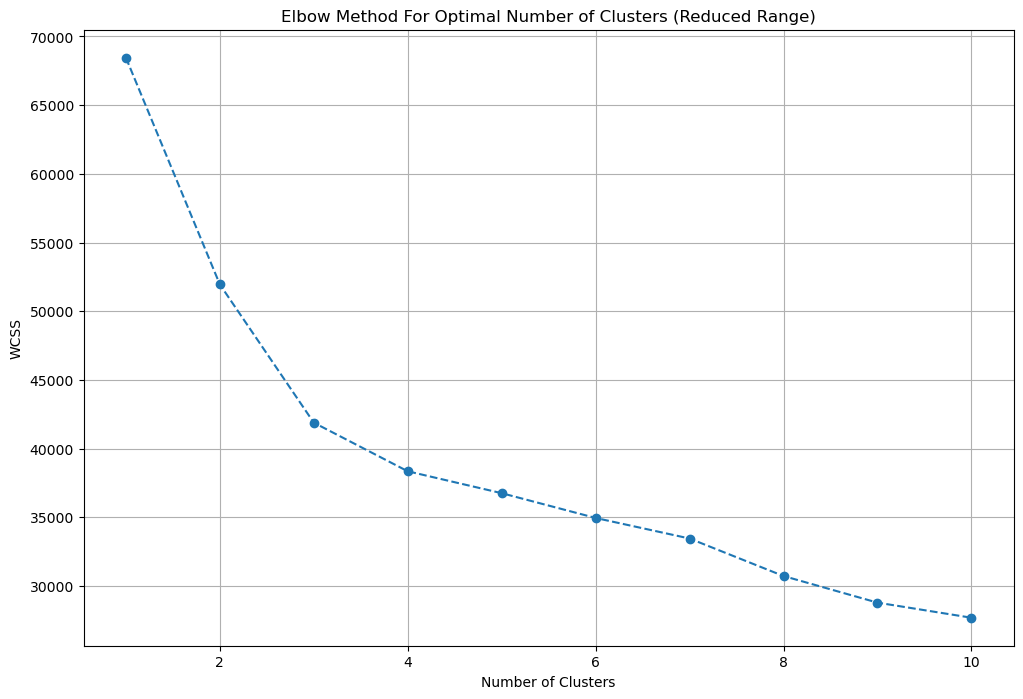

In [161]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [162]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [163]:
df['furnishing_type'] = cluster_assignments

In [164]:
df[df['furnishing_type']== 0][['furnishDetails','furnishing_type']]

,furnishDetails,furnishing_type
14,"['1 water purifier', '1 fridge', '1 fan', '1 e...",0
19,"['1 water purifier', '22 fan', '1 fridge', '1 ...",0
26,"['1 water purifier', '10 fan', '1 fridge', '1 ...",0
31,"['1 water purifier', '5 fan', '1 fridge', '1 e...",0
44,"['1 water purifier', '5 fan', '1 exhaust fan',...",0
...,...,...
3687,"['1 water purifier', '1 fan', '1 fridge', '1 e...",0
3703,"['1 fridge', '1 fan', '1 exhaust fan', '1 dini...",0
3706,"['1 water purifier', '4 fan', '1 fridge', '1 d...",0
3727,"['1 water purifier', '1 fridge', '1 geyser', '...",0


In [165]:
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

In [166]:
df.drop(columns =new_cols,inplace = True)

In [167]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features', 'super_built_up_area', 'built_up_area',
       'carpet_area', 'study room', 'servant room', 'store room', 'pooja room',
       'others', 'furnishing_type'],
      dtype='object')

In [168]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features', 'super_built_up_area', 'built_up_area',
       'carpet_area', 'study room', 'servant room', 'store room', 'pooja room',
       'others', 'furnishing_type'],
      dtype='object')

In [169]:
# features column

df[['features']]

,features
0,"['Lift(s)', 'Park']"
1,"['Power Back-up', 'Intercom Facility', 'Lift(s..."
2,"['Intercom Facility', 'Lift(s)', 'Park']"
3,"['Feng Shui / Vaastu Compliant', 'Security / F..."
4,"['Centrally Air Conditioned', 'Water purifier'..."
...,...
3798,"['Security / Fire Alarm', 'Power Back-up', 'Fe..."
3799,"['Water purifier', 'Centrally Air Conditioned'..."
3800,"['Power Back-up', 'Intercom Facility', 'Lift(s..."
3801,"['Private Garden / Terrace', 'Water purifier',..."


In [170]:
df.features.isnull().sum()

635

In [172]:
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Pa...","{'Bajghera Road': '800 Meter', 'Palam Vihar Ha...",https://www.99acres.com/smartworld-one-dxp-sec...,"{'2 BHK': {'building_type': 'Apartment', 'area...","['Swimming Pool', 'Salon', 'Restaurant', 'Spa'..."
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap Un...","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The N...",https://www.99acres.com/m3m-crown-sector-111-g...,"{'3 BHK': {'building_type': 'Apartment', 'area...","['Bowling Alley', 'Mini Theatre', 'Manicured G..."


In [173]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,super built up area 1081(100.43 sq.m.)carpet a...,3,2,2,...,"['Lift(s)', 'Park']",1081.0,NaN,650.0,0,0,0,0,0,1
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,carpet area: 1103 (102.47 sq.m.),2,2,2,...,"['Power Back-up', 'Intercom Facility', 'Lift(s...",NaN,NaN,1103.0,1,1,0,0,0,1
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,carpet area: 58141 (5401.48 sq.m.),2,2,1,...,"['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,58141.0,0,0,0,0,0,1
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,built up area: 1000 (92.9 sq.m.)carpet area: 5...,2,2,1,...,"['Feng Shui / Vaastu Compliant', 'Security / F...",NaN,1000.0,585.0,0,0,0,0,0,1
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,super built up area 1995(185.34 sq.m.)built up...,3,4,3+,...,"['Centrally Air Conditioned', 'Water purifier'...",1995.0,1615.0,1476.0,0,1,0,0,1,2


In [174]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [175]:
temp_df = df[df['features'].isnull()]

In [176]:
temp_df[['society','features']]

,society,features
11,independent,NaN
22,m3m woodshire,NaN
23,godrej habitat,NaN
27,chanderlok society,NaN
28,independent,NaN
...,...,...
3774,independent,NaN
3780,sare homes,NaN
3782,suncity avenue 76,NaN
3783,independent,NaN


In [177]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')[['TopFacilities']]
x

,TopFacilities
0,NaN
1,"['Swimming Pool', 'School', 'ATM', 'Aerobics C..."
2,"['Mini Theatre', 'Foosball', 'Swimming Pool', ..."
3,NaN
4,NaN
...,...
630,NaN
631,NaN
632,"['School', 'High Speed Elevators', 'Creche/Day..."
633,NaN


In [178]:
x['TopFacilities'].values

array([nan,
       "['Swimming Pool', 'School', 'ATM', 'Aerobics Centre', 'Restaurant', 'Skating Rink', 'Theatre', 'Wi-Fi Connectivity', 'Pool Table']",
       "['Mini Theatre', 'Foosball', 'Swimming Pool', 'Flower Garden', 'Salon', 'ATM', 'Card Room', 'Piped Gas', 'Grocery Shop']",
       nan, nan,
       "['Bus Shelter', 'Infinity Pool', 'Swimming Pool', 'Bar/Chill-Out Lounge', 'Reflexology Park', 'Aerobics Centre', 'Restaurant', 'Terrace Garden', 'High Speed Elevators']",
       nan,
       "['Swimming Pool', 'Lounge', 'Aerobics Centre', 'Terrace Garden', 'Piped Gas', 'Squash Court', 'Gazebo', 'Wi-Fi Connectivity', 'Sun Deck']",
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       '[\'Jogging Track\', \'24/7 Power Backup\', \'Gated Community\', \'Gymnasium\', \'24/7 Water Supply\', \'Landscape Garden\', "Children\'s Play Area", \'Lift(s)\', \'Car Parking\']',
       "['Swimming Pool', 'Reading Lounge', 'Card Room', 'Sauna', 'Steam Room', 'Cafeteria', 'Billiards', 'Shoppin

In [179]:
df.loc[temp_df.index , 'features'] = x['TopFacilities'].values

In [180]:
df.features.isnull().sum()

481

In [181]:
import ast

In [182]:
df['features_list'] = df['features'].apply(lambda x : ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

In [183]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features', 'super_built_up_area', 'built_up_area',
       'carpet_area', 'study room', 'servant room', 'store room', 'pooja room',
       'others', 'furnishing_type', 'features_list'],
      dtype='object')

In [184]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
features_binary_matrix =mlb.fit_transform(df['features_list'])

In [185]:
features_binary_matrix = pd.DataFrame(features_binary_matrix , columns= mlb.classes_)

In [186]:
features_binary_matrix

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,...,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3799,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0
3800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3801,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0


In [187]:
features_binary_matrix.shape

(3803, 130)

In [188]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_matrix)
    wcss_reduced.append(kmeans.inertia_)

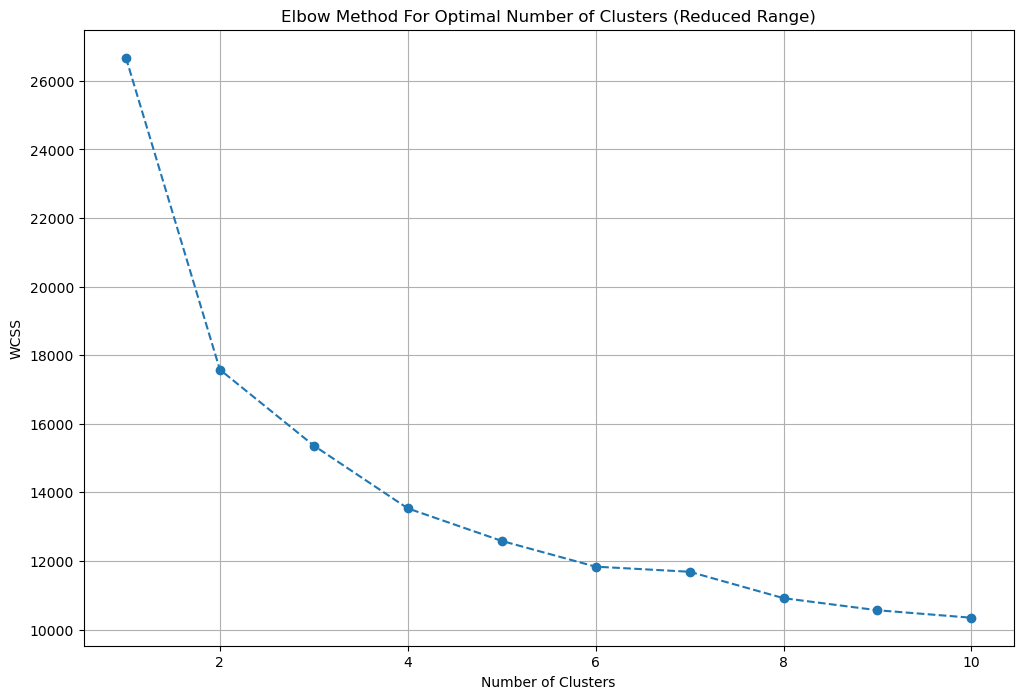

In [189]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [190]:
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}

In [191]:
len(weights)

105

In [192]:
features_binary_matrix[list(weights.keys())].shape

(3803, 105)

In [193]:
luxury_score = features_binary_matrix[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [194]:
df['luxury_score'] = luxury_score

In [195]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features', 'super_built_up_area', 'built_up_area',
       'carpet_area', 'study room', 'servant room', 'store room', 'pooja room',
       'others', 'furnishing_type', 'features_list', 'luxury_score'],
      dtype='object')

In [196]:
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [197]:
df.shape

(3803, 23)

In [198]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)